# Libraties + config

In [4]:
import sys
import os

import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)


In [30]:
from importlib import reload

import neuralnetwork.neuralNetwork as neuralnetwork
import activations.elu as elu
import activations.gelu as gelu
import activations.identity as identity
import activations.lrelu as lrelu
import activations.relu as relu
import activations.sigmoid as sigmoid
import activations.tanh as tanh

import losses.mse as mse
import optimizers.gd as gd

import plot_utils.plot_utils as plot

# updates changes
reload(neuralnetwork), reload(elu), reload(gelu), reload(identity), reload(lrelu), reload(relu), reload(sigmoid), reload(tanh)
reload(plot), reload (mse), reload(gd)

from neuralnetwork.neuralNetwork import NeuralNetWork
from activations.elu import ELU
from activations.gelu import GELU
from activations.identity import Identity
from activations.lrelu import LReLU
from activations.relu import ReLU
from activations.sigmoid import Sigmoid
from activations.tanh import Tanh

from losses.mse import MSE
from optimizers.gd import GradientDescent

from plot_utils.plot_utils import plot_af

In [51]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}

font_leg = {'family' : 'DejaVu Sans',
            'weight' : 'bold',
            'size'   : 15}

# Implemetation of the Neural Network

#### Data

In [5]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = pd.read_csv(path)

# A little cleaning
# Columns
df.columns = df.columns.str.replace("-|/", "_", regex=True)

# nulls
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

"""
Xx = df[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS"]].values
y  = df[["CO2EMISSIONS"]].values
"""
#"""
X = StandardScaler().fit_transform(df[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS"]])
y = StandardScaler().fit_transform(df[["CO2EMISSIONS"]]).reshape(-1,1)

#"""
X, X.shape

(array([[-0.9512918 , -0.88430407, -0.99896853],
        [-0.66865251, -0.5685715 , -0.99896853],
        [-1.30459092, -1.63058106, -0.99896853],
        ...,
        [-0.24469358,  0.06289365,  0.11424235],
        [-0.10337393, -0.08062116,  0.11424235],
        [-0.10337393,  0.34992326,  0.11424235]]),
 (1067, 3))

#### Neural network architecture design

In [38]:
# Init the Nn
nn = NeuralNetWork(input_shape=(None, X.shape[1]))
nn.input_shape

# Activations to use
relu = ReLU()
iden = Identity()

# architecture
nn.add(128, relu)
nn.add(64,  relu)
nn.add(32,  relu)
nn.add(32,  relu)
nn.add(1,   iden)

# Then each layer has the following shape
nn.layer_shapes

{'0': (3, None),
 '1': (128, 3),
 '2': (64, 128),
 '3': (32, 64),
 '4': (32, 32),
 '5': (1, 32)}

In [39]:
# Weights in t l-th layer
l = 2
nn.weights[f'w_{l}'], nn.weights[f'w_{l}'].shape

(array([[-0.05471999,  0.06063172, -0.04148613, ..., -0.01146904,
         -0.01526793, -0.07677828],
        [-0.03856327, -0.06972978,  0.06867942, ..., -0.0669591 ,
          0.00754357, -0.02029866],
        [ 0.09460651, -0.02389308, -0.07326505, ...,  0.05917788,
          0.04646275, -0.00760537],
        ...,
        [-0.08245634,  0.05143961, -0.03539257, ..., -0.03392127,
         -0.01574041,  0.01994566],
        [-0.02172457, -0.02406918, -0.00188714, ..., -0.00648364,
          0.06522286,  0.00213707],
        [-0.07083239, -0.0821359 , -0.04839573, ..., -0.04979037,
          0.05623173,  0.00583862]]),
 (64, 128))

##### Compiling and training

In [40]:
# compile
nn.compile_model(loss=MSE(),
                 optimizer=GradientDescent(eta=0.1))

In [41]:
# training
nn.fit(X=X, y=y, batch_size=32, epochs=30)

Epoch 1/30, Loss: 17.49617580
Epoch 2/30, Loss: 9.51340744
Epoch 3/30, Loss: 5.28445687
Epoch 4/30, Loss: 4.27189133
Epoch 5/30, Loss: 3.88550408
Epoch 6/30, Loss: 3.60859868
Epoch 7/30, Loss: 3.47351190
Epoch 8/30, Loss: 3.35209835
Epoch 9/30, Loss: 3.30262077
Epoch 10/30, Loss: 3.23057195
Epoch 11/30, Loss: 3.15572595
Epoch 12/30, Loss: 3.08027650
Epoch 13/30, Loss: 3.04818926
Epoch 14/30, Loss: 3.00344520
Epoch 15/30, Loss: 2.96747970
Epoch 16/30, Loss: 2.91810049
Epoch 17/30, Loss: 2.87438202
Epoch 18/30, Loss: 2.87129484
Epoch 19/30, Loss: 2.84236382
Epoch 20/30, Loss: 2.80800063
Epoch 21/30, Loss: 2.80688327
Epoch 22/30, Loss: 2.79252034
Epoch 23/30, Loss: 2.77014455
Epoch 24/30, Loss: 2.75491634
Epoch 25/30, Loss: 2.75131864
Epoch 26/30, Loss: 2.75552482
Epoch 27/30, Loss: 2.72843725
Epoch 28/30, Loss: 2.69389547
Epoch 29/30, Loss: 2.70222444
Epoch 30/30, Loss: 2.69522554


#### Metrics

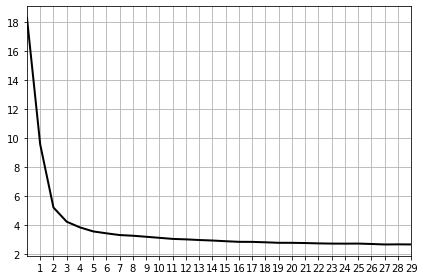

In [52]:
fig, ax = plt.subplots()

loss_average = np.mean(np.reshape(nn.losses, (nn.epochs, -1)), axis=1)
ax.plot(loss_average, c="k", lw=2)

ax.set_xlim(0, len(loss_average)-1)
ax.set_xticks(range(1, len(loss_average)), range(1,len(loss_average)))

ax.grid()
plt.tight_layout()
plt.show()

#### Predictions

In [49]:
#pred
n, i = 0, 150
pred = nn.predict(X[n:n+i])

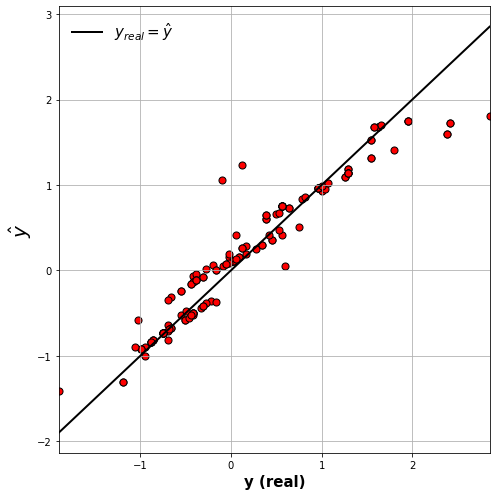

In [61]:
fig, ax = plt.subplots(figsize=(7,7))

# pred vs real
ax.scatter(x=y[n:n+i],
           y=pred[:,[0][0]],
           s=50, c="r", edgecolor='black')

# y=x
ax.plot(np.linspace(min(y[n:n+i]), max(y[n:n+i])),
        np.linspace(min(y[n:n+i]), max(y[n:n+i])),
        lw=2, c="k", label=r"$y_{real} = \hat y$")

# custum
ax.set_xlim(min(y[n:n+i]), max(y[n:n+i]))

ax.set_xlabel("y (real)", fontdict=font_leg)
ax.set_ylabel(r"$\hat y$", fontdict=font)
plt.legend(frameon=False, ncol=3, prop=font_leg)
ax.grid()
plt.tight_layout()
plt.show()